## Dictionary

In [1]:
# list stores data using index
a = [1,2,3,4]
b = ['a', 'b','hahah', 'as']

# so you can retrieve data using index
print(a[2])
print(b[3])

3
as


In [2]:
# dictionary (dict) using key to restores data
# dict {key: value}
dic = {'name': 'Chris', 'age':21, 'weight': 72}

# so you can retrieve data using key
dic['age']

21

In [3]:
import pandas as pd

marketing = pd.read_csv('DirectMarketing.csv')

# Remember this dataset?
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Gender_b,Married_b,Location_b,Ownhome_b,Age_y,Age_m,Hist_m,Hist_h
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1,0,0,1,0,0,0,1
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0,0,1,0,0,1,0,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,1,0,1,0,1,0,0,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,0,1,1,1,0,1,0,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1,0,1,1,0,1,0,1


## Aggregating data

In [4]:
# get the means of each of the groups in "Age"
# we can filter our data through boolean indexing
old = marketing[marketing["Age"] == "Old"]
middle = marketing[marketing["Age"] == "Middle"]
young = marketing[marketing["Age"] == "Young"]


In [5]:
print(old.mean())
print(middle.mean())
print(young.mean())

# you can do this because age category is small,
# what if it goes 1000 catagories?

Salary         56365.853659
Children           0.136585
Catalogs          15.160976
AmountSpent     1432.126829
Gender_b           0.629268
Married_b          0.624390
Location_b         0.697561
Ownhome_b          0.726829
Age_y              0.000000
Age_m              0.000000
Hist_m             0.243902
Hist_h             0.395122
dtype: float64
Salary         72036.417323
Children           1.187008
Catalogs          15.425197
AmountSpent     1501.690945
Gender_b           0.405512
Married_b          0.578740
Location_b         0.728346
Ownhome_b          0.639764
Age_y              0.000000
Age_m              1.000000
Hist_m             0.250000
Hist_h             0.328740
dtype: float64
Salary         27715.679443
Children           1.055749
Catalogs          13.024390
AmountSpent      558.623693
Gender_b           0.595819
Married_b          0.278746
Location_b         0.686411
Ownhome_b          0.146341
Age_y              1.000000
Age_m              0.000000
Hist_m            

In [6]:
# we create a new DF, that splits the marketing DF according to the different groups of Age
age_group = marketing.groupby("Age")

In [7]:
# it is actually a new datatype "DataFrameGroupBy"
print(type(age_group))
print(type(marketing))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
# DataFrameGroupBy shares a lot of functions with a normal DF, but with slight differences
# the head() gets the first 5 rows of EACH group
# a lot functions operate on the groups separately
age_group.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Gender_b,Married_b,Location_b,Ownhome_b,Age_y,Age_m,Hist_m,Hist_h
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1,0,0,1,0,0,0,1
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0,0,1,0,0,1,0,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,1,0,1,0,1,0,0,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,0,1,1,1,0,1,0,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1,0,1,1,0,1,0,1
5,Young,Male,Own,Married,Close,30400,0,Low,6,495,0,1,1,1,1,0,0,0
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782,1,0,1,0,0,1,1,0
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155,0,0,1,1,0,1,0,1
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034,0,1,0,1,0,0,0,0
10,Young,Male,Rent,Married,Close,43700,1,NaN,12,927,0,1,1,0,1,0,0,0


In [9]:
# the groupby() is used for summarising each groups statistics (mean(), median(), std() etc)
# calculate the mean of each group of "AGE" for each column
age_group.mean()

,Salary,Children,Catalogs,AmountSpent,Gender_b,Married_b,Location_b,Ownhome_b,Age_y,Age_m,Hist_m,Hist_h
Age,,,,,,,,,,,,
Middle,72036.417323,1.187008,15.425197,1501.690945,0.405512,0.578740,0.728346,0.639764,0.0,1.0,0.250000,0.328740
Old,56365.853659,0.136585,15.160976,1432.126829,0.629268,0.624390,0.697561,0.726829,0.0,0.0,0.243902,0.395122
Young,27715.679443,1.055749,13.024390,558.623693,0.595819,0.278746,0.686411,0.146341,1.0,0.0,0.121951,0.024390


In [10]:
# note it is different from the raw data mean
marketing.mean()

Salary         56103.900
Children           0.934
Catalogs          14.682
AmountSpent     1216.770
Gender_b           0.506
Married_b          0.502
Location_b         0.710
Ownhome_b          0.516
Age_y              0.287
Age_m              0.508
Hist_m             0.212
Hist_h             0.255
dtype: float64

In [11]:
# get the mean Salary
# age_group.mean() is another DF, with the row labels (indexs) the name of each group
age_group.mean()["Salary"]

Age
Middle    72036.417323
Old       56365.853659
Young     27715.679443
Name: Salary, dtype: float64

In [12]:
# show which rows belong to each group
# result is a dict
# with keys of the names of the groups
# values, being a list of the indexs 
print(age_group.groups)

{'Middle': Int64Index([  1,   3,   4,   6,   7,   8,  11,  12,  13,  15,
            ...
            981, 982, 985, 988, 989, 990, 992, 993, 996, 998],
           dtype='int64', length=508), 'Old': Int64Index([  0,   9,  14,  16,  19,  22,  30,  38,  39,  43,
            ...
            956, 960, 966, 971, 980, 984, 986, 987, 991, 997],
           dtype='int64', length=205), 'Young': Int64Index([  2,   5,  10,  20,  21,  23,  24,  29,  47,  57,
            ...
            950, 958, 962, 965, 970, 974, 983, 994, 995, 999],
           dtype='int64', length=287)}


In [13]:
# get the keys of each group
age_group.groups.keys()

dict_keys(['Middle', 'Old', 'Young'])

In [14]:
# groupby() doesn't do anything by itself, only does something when you use a summarising fn()

### Merging tables/data

In [15]:
# create a raw data using dict
lunch_data = {'People': ['Kelvin', 'Haonan', 'Daniel'], 
                      'Lunch': ['Sushi', 'Cheeseburger', 'Pizza']}

# warp dict into a pd data frame
lunch = pd.DataFrame(lunch_data)
lunch

,People,Lunch
0,Kelvin,Sushi
1,Haonan,Cheeseburger
2,Daniel,Pizza


In [16]:
dinner = pd.DataFrame({'People': ['Kelvin', 'Haonan', 'Annabelle'], 
                       'Dinner': ['Ramen', 'Salad', 'Thai']})
dinner

,People,Dinner
0,Kelvin,Ramen
1,Haonan,Salad
2,Annabelle,Thai


In [17]:
# outter -> union: if data only appear in one table, store 'NaN' in other table in joint table
combined = lunch.merge(dinner,how="outer")
combined

,People,Lunch,Dinner
0,Kelvin,Sushi,Ramen
1,Haonan,Cheeseburger,Salad
2,Daniel,Pizza,NaN
3,Annabelle,NaN,Thai


In [18]:
# inner -> intersection: if data only appear in one table, it won't be stored in joint table
combined = lunch.merge(dinner,how="inner")
combined

,People,Lunch,Dinner
0,Kelvin,Sushi,Ramen
1,Haonan,Cheeseburger,Salad


### API's

In [19]:
# an interface that allows us to get data from remote 
# location or external party.

# E.g. when you signup for a website, you get the option of "Sign up with FB"
# the website asks FB's for FB's information about you, using FB's login API
# this allows the website to get email address, profile pic etc that is stored
# at FB

# this means the website doesn't have to store this information themselves
# and rather just have FB to look after the data
# but you need this API in order to communicate to FB's database

In [20]:
# in practice, the API is a url with a query asking for the specific information

In [21]:
# authtoken to access the dataset
api_key = '491a9ec8e8da3febdea1b7e83c2e9ed3'

# public domain address for dataset
base_url = "http://api.openweathermap.org/data/2.5/weather?" 

# just for query input
city_name = input("Enter city name : ")

# '?' to start the query
# '&' for mulitple query, order doesn't matter
# '=' assign the query value
url = base_url + "appid=" + api_key + "&q=" + city_name

print(url)

Enter city name : Sydney
http://api.openweathermap.org/data/2.5/weather?appid=491a9ec8e8da3febdea1b7e83c2e9ed3&q=Sydney


In [22]:
# we want to store the data from the "GET" request into python
import requests, json
# this is equivalent to typing the url into the address bar
response = requests.get(url)

# converts the data into a "human readable" format
# converts the data into a json type
# a json is a string representation of a dict
x = response.json() 

print(x)

{'coord': {'lon': 151.22, 'lat': -33.85}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 286.7, 'pressure': 1021, 'humidity': 87, 'temp_min': 285.37, 'temp_max': 288.15}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1566894168, 'sys': {'type': 1, 'id': 9600, 'message': 0.0077, 'country': 'AU', 'sunrise': 1566850863, 'sunset': 1566891190}, 'timezone': 36000, 'id': 2147714, 'name': 'Sydney', 'cod': 200}


In [23]:
print(x['coord']) # store a dict into a dict
print(x['coord']['lon']) # get lon value by keys

{'lon': 151.22, 'lat': -33.85}
151.22


In [24]:
print(x['weather']) # store a list into a dict
print(x['weather'][0]) # store a dict as first element (index = 0) into a list
print(x['weather'][0]['description']) # get description

[{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}]
{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}
shower rain


### Exercise 3

In [28]:
lat = input('Enter lat: ')
lon = input('Enter lon: ')
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query = 'lat='+ lat + "&lon=" + lon + "&appid=" + api_key
url = base_url + query
print(url)

Enter lat: 
Enter lon: 
http://api.openweathermap.org/data/2.5/weather?lat=&lon=&appid=491a9ec8e8da3febdea1b7e83c2e9ed3


In [29]:
# get python to make a GET request at the url
response = requests.get(url)
x = response.json() 

print(x)

{'cod': '400', 'message': 'undefined is not a float'}


In [30]:
x["name"]

KeyError: 'name'

In [50]:
# is the HTTP status code
# tells the request you've made is a success or not
# 200 ---> request has succeeded (got some data)
# 404 ---> the url doesn't exist or we've made a bad query
x["cod"]

'400'

In [ ]:
# install
pip install quandl

# you can install yourself
# install quandl by 'conda install -c anaconda quandl' in terminal (macos) or anaconda promt(windows)

In [31]:
import quandl

api_key = 'QV43tMteJEMB4s1__FbP'

# this method automatically constructs the url (query)
# and then performs the GET request at that url
fb_data = quandl.get("WIKI/FB", 
                     trim_start = "2017-12-12", 
                     trim_end = "2018-12-30", 
                     authtoken=api_key)

fb_data.head()

# play around time series example https://docs.quandl.com/docs/python-time-series

ModuleNotFoundError: No module named 'quandl'

## Bar charts

In [32]:
# make raw data with dict
data = {'Age': ['Young','Middle','Old'],
        'Male': [1783,2289,1032],
        'Female': [1950,2320,1491],
        'Total': [3733,4609,2523]
        }

# warp data from dict into a pd data frame
df = pd.DataFrame(data,columns= ['Age', 'Male', 'Female','Total'])

df.head()

,Age,Male,Female,Total
0,Young,1783,1950,3733
1,Middle,2289,2320,4609
2,Old,1032,1491,2523


In [33]:
# this is of type Series
# Series has 2 columns
# LHS is the index or the key of each row
# RHS is the value for each of those keys
df['Total']

0    3733
1    4609
2    2523
Name: Total, dtype: int64

In [34]:
# gets the labels
df['Total'].index

RangeIndex(start=0, stop=3, step=1)

In [38]:
# data frame 
print(type(df['Total']))
# get the numpy value that python can deal with it
print(type(df['Total'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [42]:
# numpy range
import numpy as np
np.arange(start=1, stop =10, step =2)

array([1, 3, 5, 7, 9])

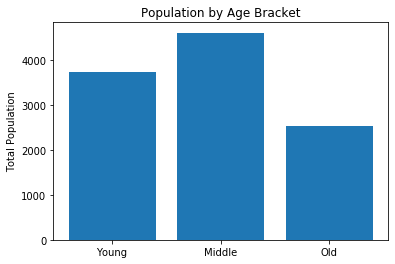

In [46]:
%matplotlib inline

# math lib
import numpy as np

# visualization lib
import matplotlib.pyplot as plt

# numpy range
# e.g. np.arange(start=1, stop =10, step =2)
# get the numpy value that python can deal with it
total = df['Total'].values

# it creates an array starting from 0 up until len(total)-1,
x_pos = np.arange(len(total))

# x = x_pos, y = total
plt.bar(x_pos, total, align='center')

# replace 0,1,2 to ('Young', 'Middle', 'Old')
plt.xticks(x_pos, ('Young', 'Middle', 'Old'))

# add labels and title
plt.ylabel('Total Population')
plt.title('Population by Age Bracket')
 
plt.show()

### Task 1

In [47]:
# task 1-1
# step 1: load the dataset
file = pd.read_csv('DirectMarketing.csv')
# step 2: use the .groupby() to get the age groups 
age_group = file.groupby('Age')
# step 3: get the mean and the column AmountSpent for that mean (y value)
result = age_group['AmountSpent'].mean()
print(result)

Age
Middle    1501.690945
Old       1432.126829
Young      558.623693
Name: AmountSpent, dtype: float64


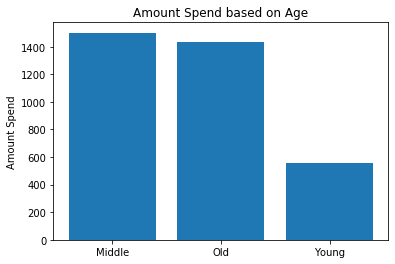

In [49]:
# task 1-2
# get the key of age_group
x_pos = age_group.groups.keys()

# x = x_pos, y = total
plt.bar(x_pos, result, align='center')

# add labels and title
plt.ylabel('Amount Spend')
plt.title('Amount Spend based on Age')

plt.show()